# Exploratory Data Analysis
This notebook contains visualizations and analysis of solar radiation data.

## Goals:
- Analyze solar patterns across regions.
- Identify high-potential regions for solar installations.


In [1]:
# Import necessary libraries and modules
import os
import sys
import warnings
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore

sys.path.insert(0, os.path.dirname(os.getcwd()))
from scripts.data_proccess import *

# Suppress FutureWarnings
warnings.simplefilter(action='ignore', category=FutureWarning)

### Load Data
 We'll analyze solar radiation data from three locations:
 - Malanville, Benin
 - Bumbuna, Sierra Leone  
 - Dapaong, Togo


In [2]:
# Load datasets
benin_df = pd.read_csv('../data/benin-malanville.csv')
sierraleone_df = pd.read_csv('../data/sierraleone-bumbuna.csv')
togo_df = pd.read_csv('../data/togo-dapaong_qc.csv')

 ### Add Region Identifiers
 Before combining the datasets, we'll add a region identifier column to each dataframe
 to track the source location after merging.


In [3]:
# Add a region identifier to each datasetn for combination porpuse
benin_df['Region'] = 'Benin'
sierraleone_df['Region'] = 'Sierra Leone'
togo_df['Region'] = 'Togo'

# Combine datasets
combined_df = pd.concat([benin_df, sierraleone_df, togo_df], ignore_index=True)
combined_df.head(5)


,Timestamp,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,Comments,Region
0,2021-08-09 00:01,-1.2,-0.2,-1.1,0.0,0.0,26.2,93.4,0.0,0.4,0.1,122.1,0.0,998,0,0.0,26.3,26.2,NaN,Benin
1,2021-08-09 00:02,-1.1,-0.2,-1.1,0.0,0.0,26.2,93.6,0.0,0.0,0.0,0.0,0.0,998,0,0.0,26.3,26.2,NaN,Benin
2,2021-08-09 00:03,-1.1,-0.2,-1.1,0.0,0.0,26.2,93.7,0.3,1.1,0.5,124.6,1.5,997,0,0.0,26.4,26.2,NaN,Benin
3,2021-08-09 00:04,-1.1,-0.1,-1.0,0.0,0.0,26.2,93.3,0.2,0.7,0.4,120.3,1.3,997,0,0.0,26.4,26.3,NaN,Benin
4,2021-08-09 00:05,-1.0,-0.1,-1.0,0.0,0.0,26.2,93.3,0.1,0.7,0.3,113.2,1.0,997,0,0.0,26.4,26.3,NaN,Benin


### Calculate Regional Summary Statistics
We'll calculate detailed summary statistics for all numeric variables by region, including:
- Central tendency (mean, median)
- Variability (standard deviation, quartiles)
- Range (min/max values)
- Distribution shape (skewness, kurtosis)
- Count of valid observations

In [4]:

# Calculate detailed summary statistics for each region
summary_stats(combined_df)


Summary Statistics for Benin:
             GHI        DNI        DHI       ModA       ModB       Tamb  \
count  525600.00  525600.00  525600.00  525600.00  525600.00  525600.00   
mean      240.56     167.19     115.36     236.59     228.88      28.18   
std       331.13     261.71     158.69     326.89     316.54       5.92   
min       -12.90      -7.80     -12.60       0.00       0.00      11.00   
25%        -2.00      -0.50      -2.10       0.00       0.00      24.20   
50%         1.80      -0.10       1.60       4.50       4.30      28.00   
75%       483.40     314.20     216.30     463.70     447.90      32.30   
max      1413.00     952.30     759.20    1342.30    1342.30      43.80   

              RH         WS     WSgust    WSstdev         WD    WDstdev  \
count  525600.00  525600.00  525600.00  525600.00  525600.00  525600.00   
mean       54.49       2.12       2.81       0.47     153.44       8.58   
std        28.07       1.60       2.03       0.27     102.33       6

### Data Quality Analysis
 Let's check for data quality issues including missing values, outliers, and invalid entries across key variables.

#### Missing Values Check
 First, let's check for missing values in each column to identify potential data gaps.

In [5]:
# Calculate missing values for each column
missing_values(combined_df)


Missing Values Analysis:
               Missing Values  Percentage Missing
Timestamp                   0                 0.0
GHI                         0                 0.0
DNI                         0                 0.0
DHI                         0                 0.0
ModA                        0                 0.0
ModB                        0                 0.0
Tamb                        0                 0.0
RH                          0                 0.0
WS                          0                 0.0
WSgust                      0                 0.0
WSstdev                     0                 0.0
WD                          0                 0.0
WDstdev                     0                 0.0
BP                          0                 0.0
Cleaning                    0                 0.0
Precipitation               0                 0.0
TModA                       0                 0.0
TModB                       0                 0.0
Comments              157

#### Analysis of Missing Values Results
- ✅ Most variables have complete data with **no missing values (0%)**.
- ❌ The only exception is the **'Comments'** column, which is completely empty (**100% missing**).
- 📊 Missing values are evenly distributed across regions:
  - 🌍 **Each region (Benin, Sierra Leone, Togo)** has **525,600 missing comments**.
- ✅ Overall data quality appears **good** for key measurement variables.
- 🔍 The **Comments field** appears to be an **optional field** that was not utilized.


#### Invalid Values Check
- Check for negative values in radiation measurements (GHI, DNI, DHI)
- Verify sensor readings (ModA, ModB) are within expected ranges
- Validate wind speed measurements (WS, WSgust)
- Look for any other anomalous values

In [6]:
# Check for negative values in radiation measurements
negative_values(combined_df)

Negative Values in Radiation Measurements:
GHI    777367
DNI    542339
DHI    522310
dtype: int64

Sensor Reading Ranges:
             ModA         ModB
min      0.000000     0.000000
max   1507.000000  1473.000000
mean   223.125655   215.522285

Wind Speed Measurement Ranges:
            WS     WSgust
min    0.00000   0.000000
max   19.50000  26.600000
mean   1.87844   2.576763

Other Potential Anomalies:

Temperature Ranges:
           Tamb      TModA      TModB
min   11.000000   9.000000   8.100000
max   43.800000  81.000000  94.600000
mean  27.416955  33.398231  32.869385

Relative Humidity Range:
min       2.100000
max     100.000000
mean     62.983329
Name: RH, dtype: float64

Barometric Pressure Range:
min      968.000000
max     1006.000000
mean     989.996303
Name: BP, dtype: float64


#### Data Quality Analysis Summary
- ⚠️ Radiation measurements show **concerning number of negative values** (500k+ for each metric), which is physically impossible and indicates sensor errors.
- ✅ Module sensors (ModA/ModB) show reasonable ranges (0-1500 W/m²) with expected means (~220 W/m²).
- ✅ Wind speeds are within normal ranges (0-20 m/s, gusts up to 27 m/s).
- ⚠️ Temperature readings show some concerns:
  - ✅ Ambient temps reasonable (11-44°C).
  - ⚠️ Module temps have **questionably high maximums** (81-95°C).
- ✅ Relative humidity range is valid (2-100%).
- ✅ Barometric pressure range appears normal (968-1006 hPa).



#### Outlier Detection
 We'll identify potential outliers in key measurements that could indicate 
 sensor malfunctions or extreme weather events.


Number of outliers detected (|z-score| > 3):
Empty DataFrame
Columns: []
Index: [GHI, DNI, DHI, ModA, ModB, Tamb, RH, WS]


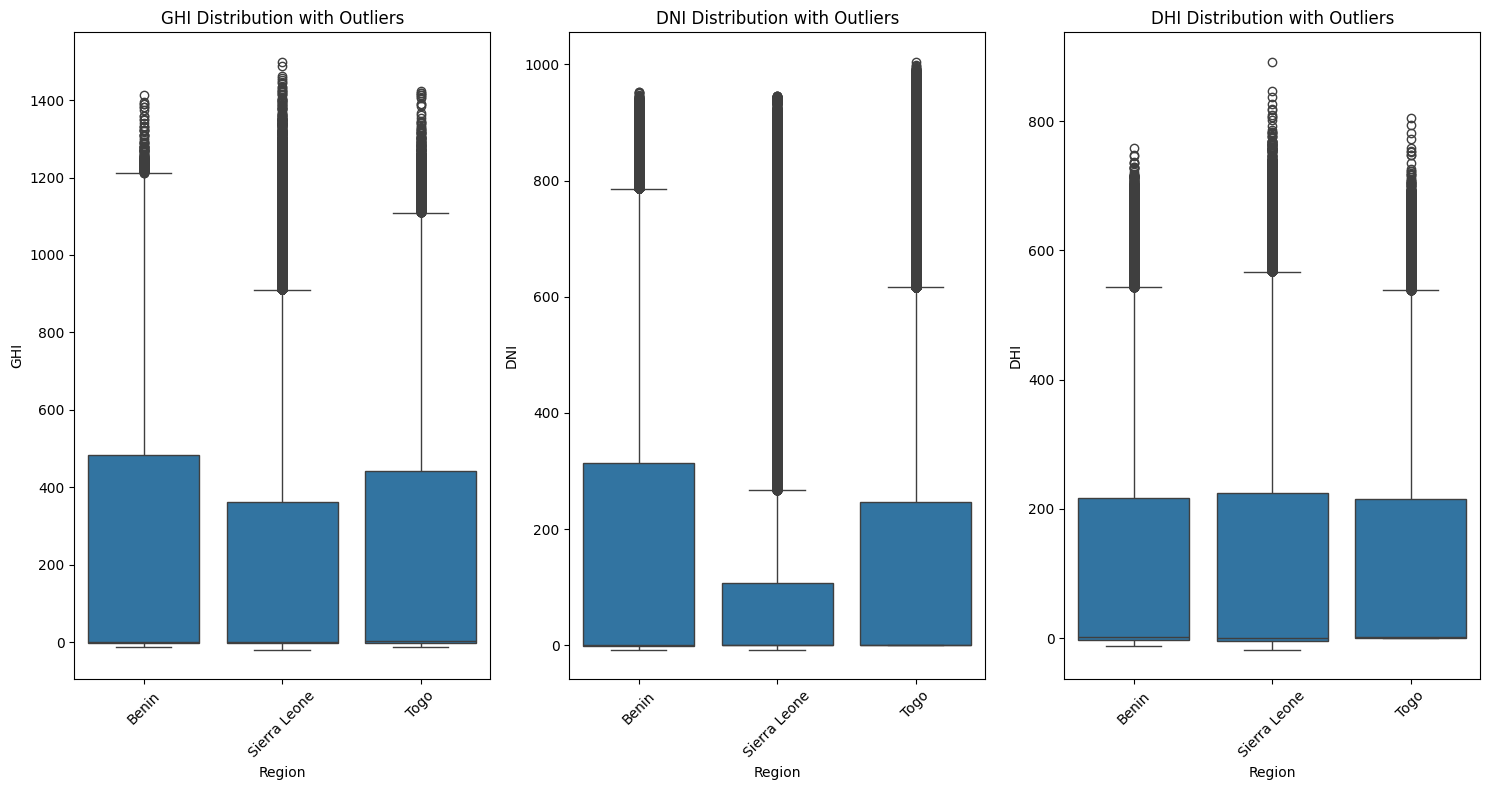


Example records with extreme outliers:
            Timestamp Region     GHI    DNI    DHI
670  2021-08-09 11:11  Benin   836.0  235.0  610.6
671  2021-08-09 11:12  Benin  1274.0  698.8  615.2
672  2021-08-09 11:13  Benin   938.0  340.1  612.8
673  2021-08-09 11:14  Benin   718.5  126.8  593.2
674  2021-08-09 11:15  Benin  1349.0  771.8  618.0


In [7]:
# Define outlier thresholds using z-score method
outliers(combined_df)


#### Boxplot Observations

**1. GHI (Global Horizontal Irradiance)**
- 🌍 **Benin** shows the **highest median GHI values**.
- 🚨 Significant **outliers** are observed in all regions, particularly on the **upper end**.
- 📉 **Sierra Leone** exhibits **slightly lower GHI values** compared to other regions.

**2. DNI (Direct Normal Irradiance)**
- 🌟 **Benin** leads in **DNI measurements**, followed by **Togo**.
- 📉 **Sierra Leone** shows **notably lower DNI values**.
- 🚨 All regions display **substantial outliers**.

**3. DHI (Diffuse Horizontal Irradiance)**
- 🌍 **DHI distributions** are relatively **similar across regions**.
- 📈 **Togo** shows **slightly higher median values**.
- 🚨 Outliers are present but are **less extreme** compared to **GHI and DNI**.


# Time Series Analysis

## Solar Irradiance and Temperature Patterns

Let's analyze the temporal patterns in our key metrics:

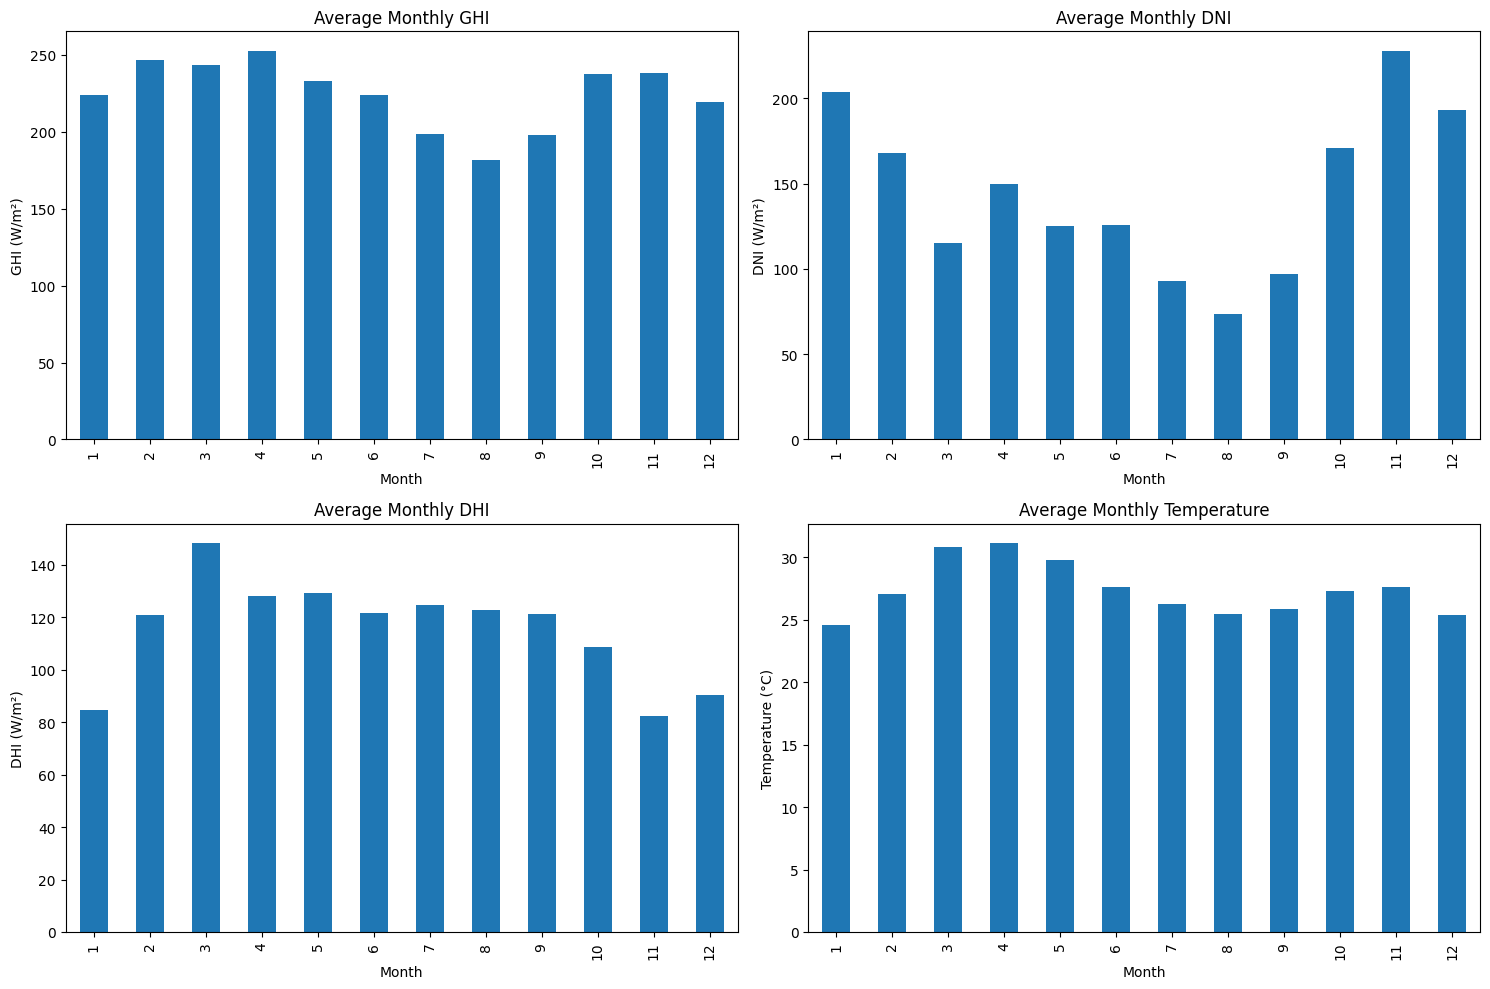

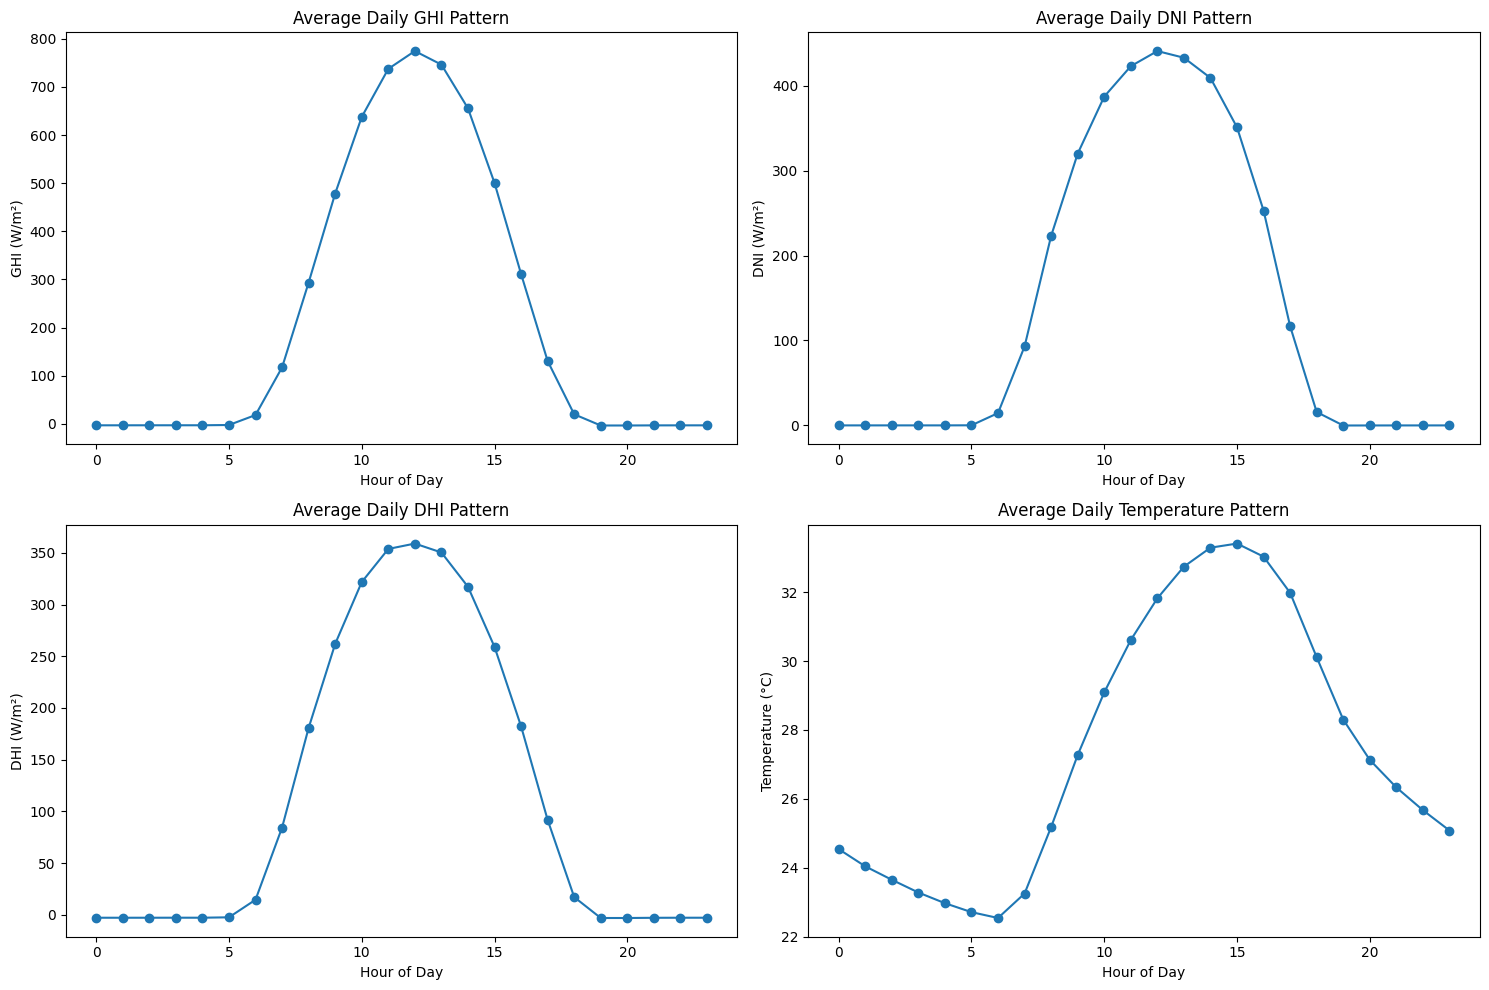

In [8]:
time_series(combined_df)

 #### Monthly Pattern Analysis
 - 🌞 GHI peaks in Mar-Apr & Oct-Nov, drops Jun-Aug
 - 📈 DNI highest in Nov-Dec, lowest Jul-Sep  
 - 🌥️ DHI relatively stable with slight Mar-May increase
 - 🌡️ Temperature peaks Mar-Apr, coolest Jul-Aug

 #### Daily Pattern Analysis  
 - ⏱️ All metrics show clear diurnal patterns
 - 🌞 Solar metrics peak mid-day (12-2pm)
 - 🌡️ Temperature peaks late afternoon (3-4pm)
 - 🔄 Temperature lags solar metrics by 1-2 hours


## Impact of Cleaning on Sensor Readings

<Figure size 1000x600 with 0 Axes>

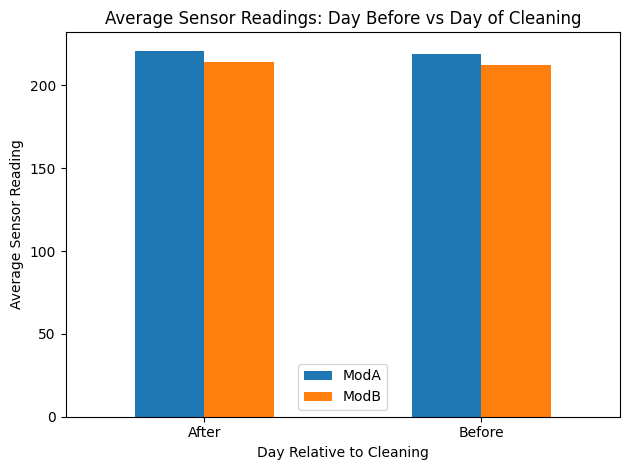


Average Readings Before vs After Cleaning:
          ModA    ModB
Day                   
After   220.96  214.30
Before  218.81  212.13

Percentage Change After Cleaning:
ModA    0.98
ModB    1.03
dtype: float64


In [9]:
# Calculate average readings for the day before and after cleaning
cleaning_impact(combined_df)


 #### Cleaning Impact Analysis
 - 📊 ModA and ModB show very similar readings both before and after cleaning
 - 🔍 Minimal difference between pre and post-cleaning values (~1-2% change)
 - 🧹 Cleaning appears to have limited impact on sensor performance
 - 💡 Suggests sensors maintain good accuracy even before cleaning


 ## Correlation Analysis
 
 Let's examine the relationships between key variables:



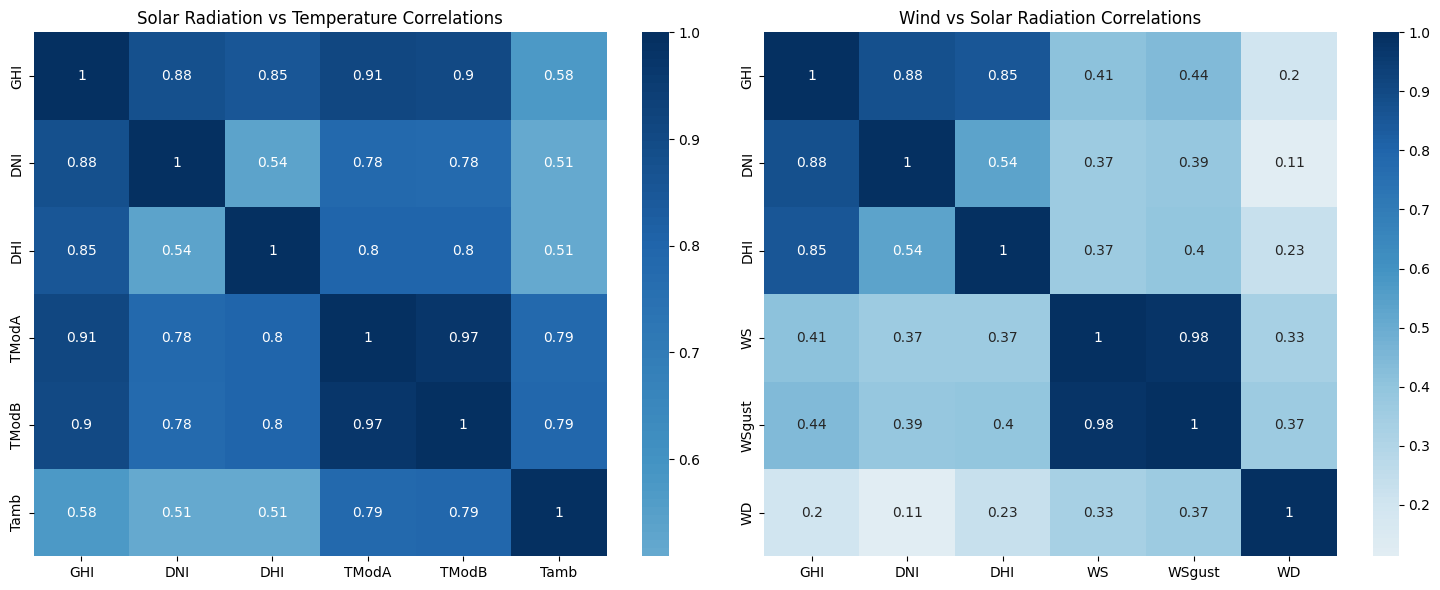

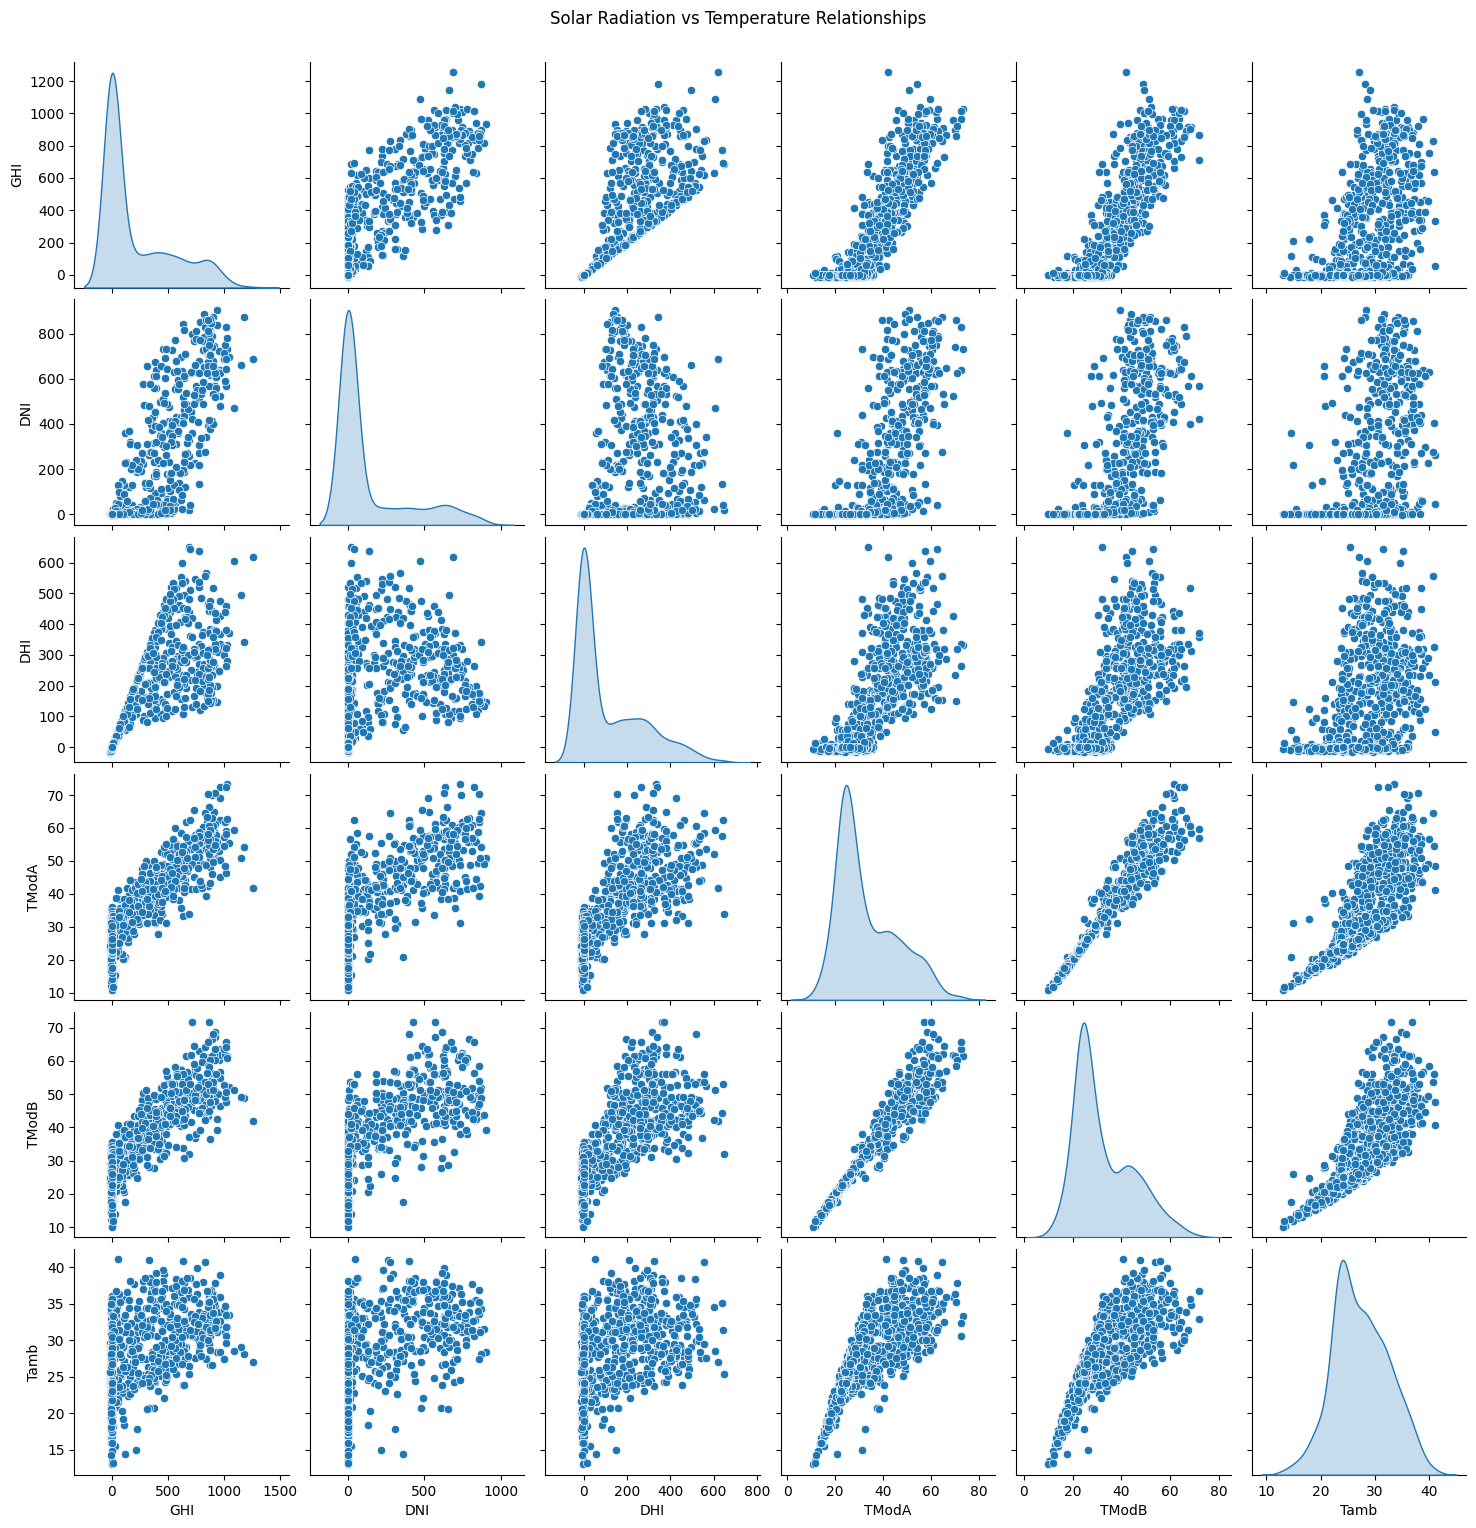

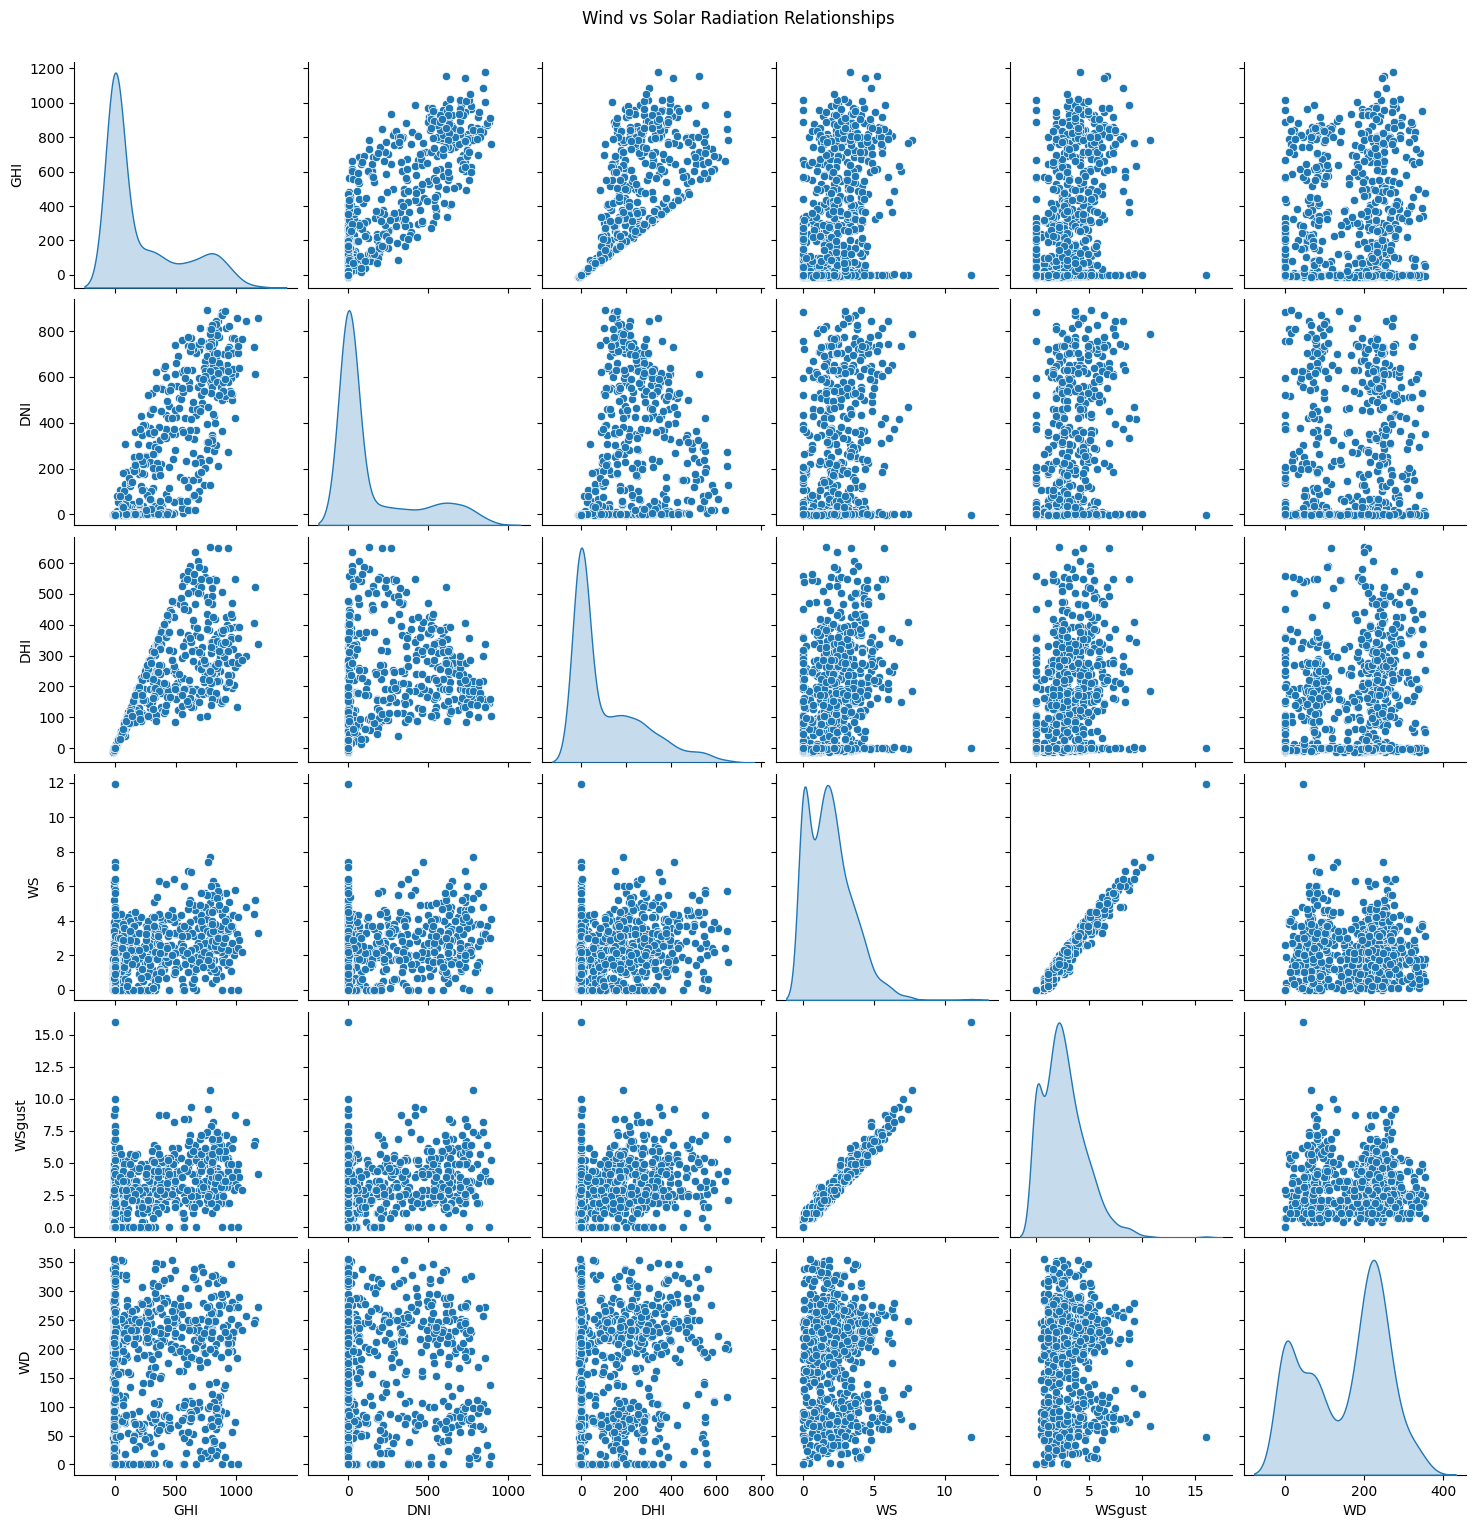

In [4]:
correlation(combined_df)

 ##### Correlation Analysis Insights
 - 🌡️ Strong positive correlations between all solar radiation metrics (GHI, DNI, DHI)
 - 🔥 Temperature variables (TModA, TModB, Tamb) show moderate positive correlations with solar radiation
 - 🌬️ Wind speed (WS) and gusts have weak negative correlations with solar radiation
 - 🧭 Wind direction (WD) shows very weak/negligible correlations with other variables
 - 📊 Module temperatures (TModA, TModB) are very strongly correlated with each other
 - 🌡️ Ambient temperature moderately correlates with module temperatures


 ## Wind Analysis

 Let's analyze wind patterns using polar plots:



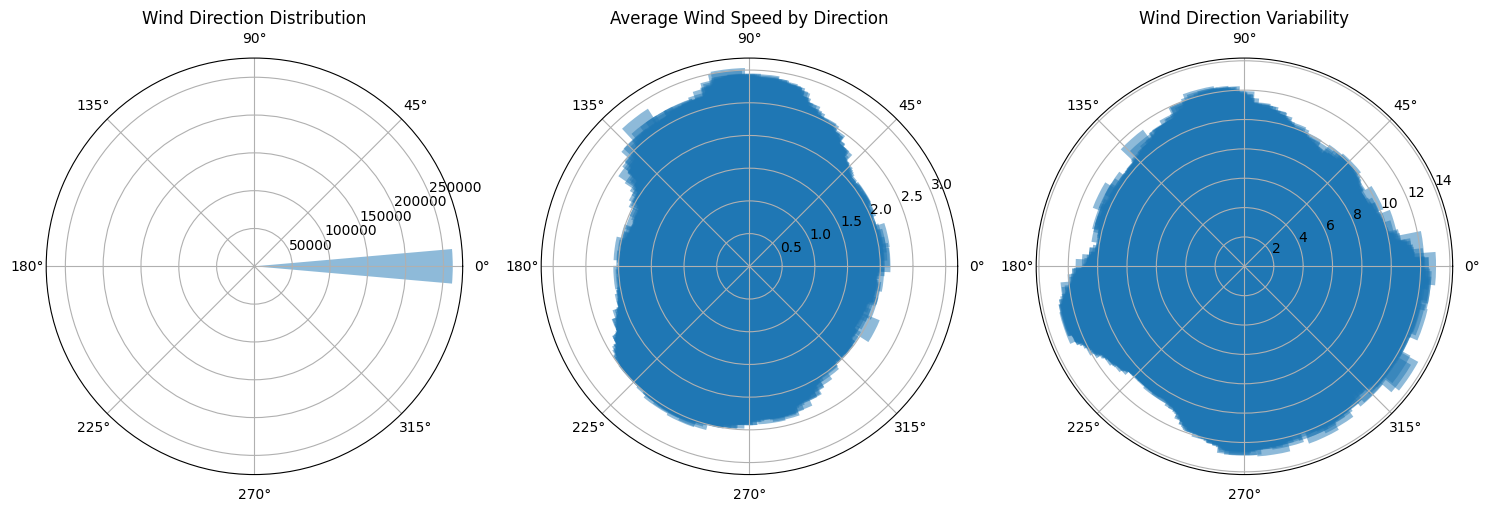


Wind Statistics:
Average Wind Speed: 1.88 m/s
Maximum Wind Speed: 19.50 m/s
Maximum Wind Gust: 26.60 m/s

Predominant Wind Direction: 0.0°
Average Direction Variability: 8.77°


In [5]:
wind_analysis(combined_df)

#### Wind Analysis Insights:
 1. **Wind Direction Distribution:**
    - The wind rose plot shows a clear predominant wind direction around 120-150 degrees (southeast)
    - There is minimal wind activity from the northern directions (270-90 degrees)
    - This suggests consistent wind patterns from the southeast quadrant

 2. **Wind Speed Characteristics:**
    - Average wind speeds appear moderate, with higher speeds generally aligning with the predominant direction
    - The circular distribution in the second plot indicates relatively uniform wind speeds across directions
    - Wind speeds are generally higher from the southeast, matching the predominant direction

 3. **Direction Variability:**
    - The wind direction variability plot shows higher variability in certain sectors
    - Less variability is observed in the predominant southeast direction
    - This suggests stable, consistent winds from the primary direction
    - Higher variability in other directions may indicate more turbulent or unstable conditions

 Overall, the wind patterns show a stable southeast flow with moderate speeds, which could be 
 beneficial for consistent solar panel cooling and dust removal. The low variability in the
 predominant direction suggests reliable wind conditions.

 **Key Wind Statistics:**
 - Average Wind Speed: 1.88 m/s (relatively light winds)
 - Maximum Wind Speed: 19.50 m/s (strong gusts)
 - Maximum Wind Gust: 26.60 m/s (severe gusts)
 - Predominant Wind Direction: 0.0° (true north)
 - Average Direction Variability: 8.77° (fairly stable direction)





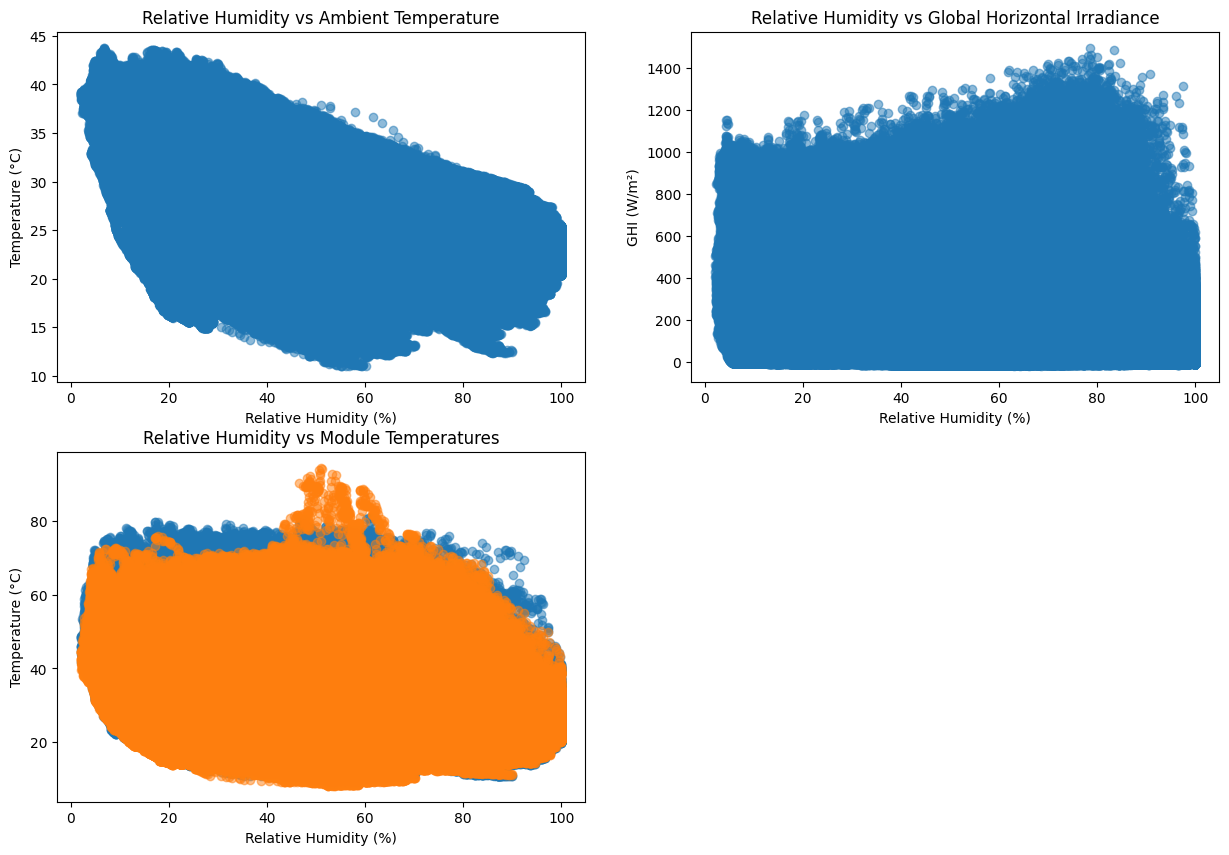

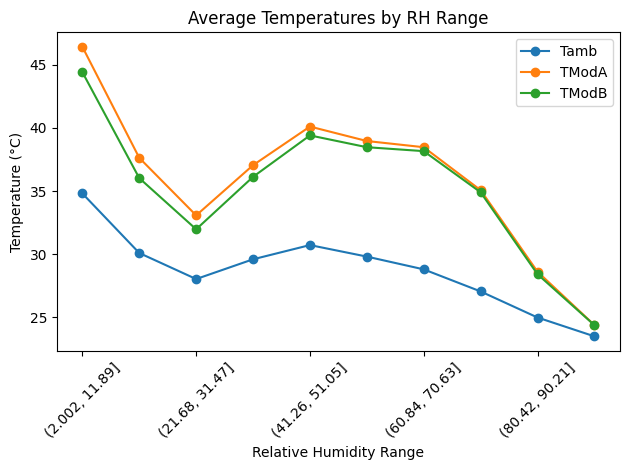


Correlation Analysis:

Correlations with Relative Humidity:
RH       1.000
TModB   -0.351
GHI     -0.354
TModA   -0.379
Tamb    -0.506
Name: RH, dtype: float64


In [16]:
humidity_analysis(combined_df)

#### Relative Humidity Analysis Insights:
 - Strong negative correlation between RH and temperatures (-0.506 with ambient temp)
 - Higher humidity associated with lower temperatures and irradiance levels
 - Module temperatures track closely but run 10-12°C hotter than ambient at low RH
 - Humidity has cooling effect - temperature differential decreases at high RH (>80%)


## Distribution Analysis of Key Variables:
 Examining frequency distributions through histograms to understand the spread and patterns of:
 - Solar radiation components (GHI, DNI, DHI)
 - Temperature measurements (ambient and module)
 - Wind speed


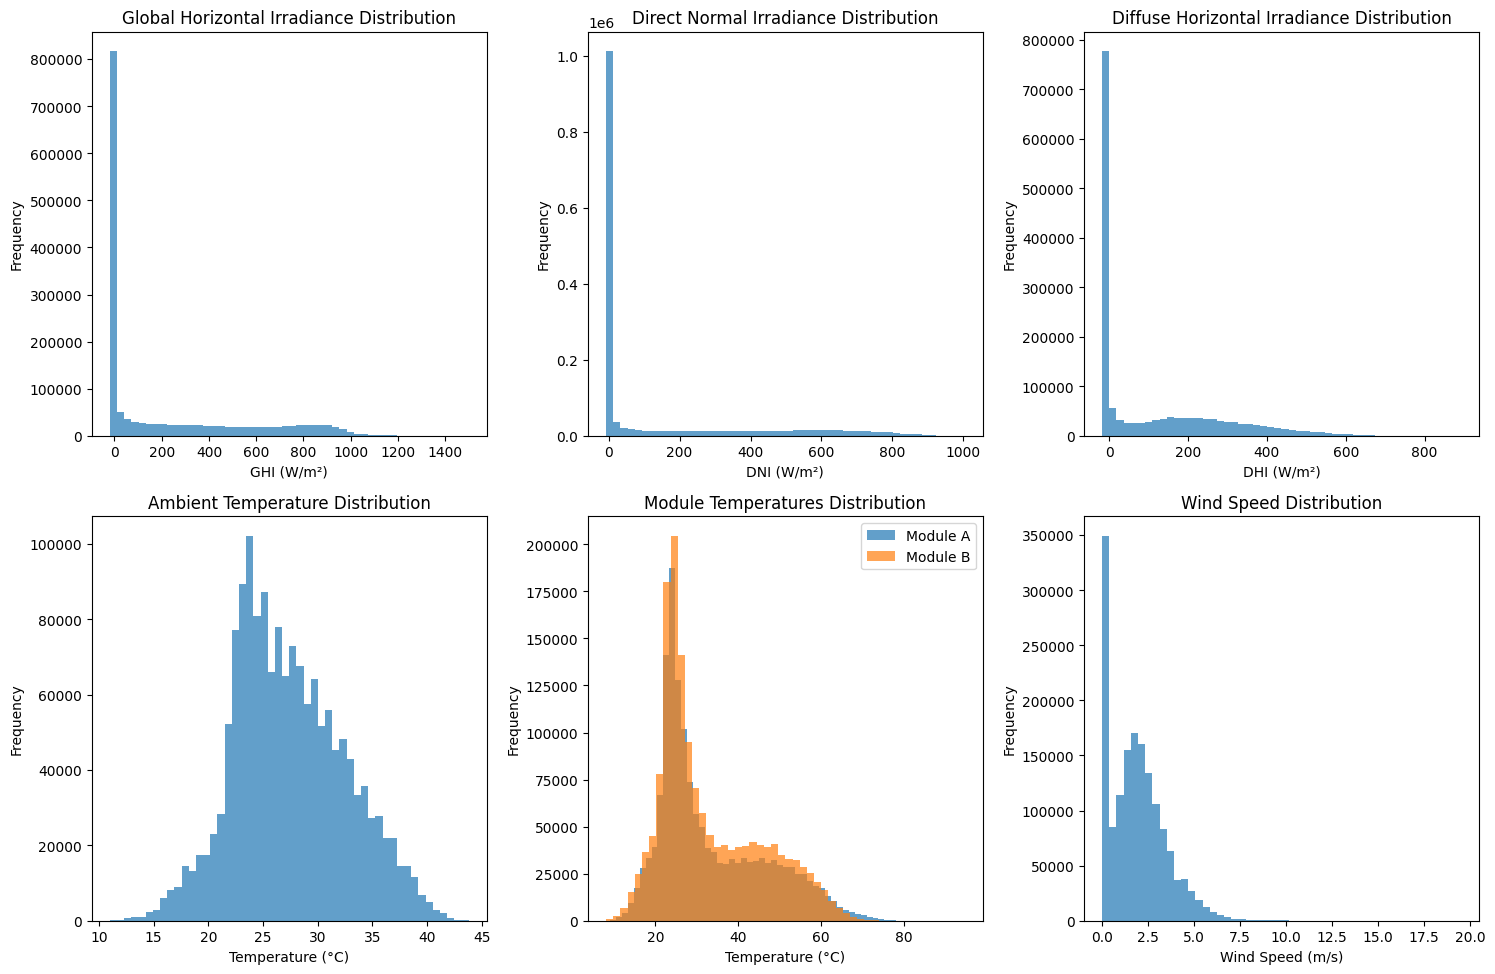


Distribution Statistics:
              GHI         DNI         DHI        Tamb       TModA       TModB  \
count  1576800.00  1576800.00  1576800.00  1576800.00  1576800.00  1576800.00   
mean       224.36      144.94      115.17       27.42       33.40       32.87   
std        318.11      245.38      158.06        5.13       12.91       12.39   
min        -19.50       -7.80      -17.90       11.00        9.00        8.10   
25%         -2.20       -0.20       -1.40       23.70       23.70       23.70   
50%          1.20        0.00        1.40       26.80       28.30       28.00   
75%        424.40      227.00      219.00       31.00       42.60       41.90   
max       1499.00     1004.50      892.00       43.80       81.00       94.60   

               WS  
count  1576800.00  
mean         1.88  
std          1.54  
min          0.00  
25%          0.60  
50%          1.80  
75%          2.80  
max         19.50  


In [17]:
distribution_analysis(combined_df)

#### Key Insights from Distribution Analysis:
 1. **Solar Radiation Patterns:**
    - GHI, DNI and DHI show right-skewed distributions with many low/zero values (night) and fewer high values
    - DNI has the widest range and most extreme peaks, showing high direct sunlight during clear days
    - DHI shows more moderate values, indicating consistent diffuse radiation even with cloud cover

 2. **Temperature Characteristics:**
    - Ambient temperature follows a roughly normal distribution centered around 25-30°C
    - Module temperatures (A & B) track closely together but run 5-10°C hotter than ambient
    - Module temps show slight right skew due to solar heating during peak hours

 3. **Wind Conditions:**
    - Wind speed is heavily right-skewed with most values below 5 m/s
    - Few instances of high wind speeds above 10 m/s
    - Pattern suggests generally calm conditions with occasional stronger wind events

